In [114]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load the data
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


Here, you can see all the column names, total values and type of the values.

We have 2 types of variables.
- Numerical variables : which contains number as values
- Categorical variables : which contains descriptions of groups or things.

In this Data set,

Numerical Variables are Math score, Reading score and Writing score.

Categorical Variables are Gender, Race/ethnicity, Parental level of education, Lunch and Test preparation course.

In [8]:
# descriptive statistics of numerical variables
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#  number of rows and columns
df.shape

(1000, 8)

In [10]:
#checks if there are any missing values
df.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 no missing values in the data

We can see that the female candidates scored higher than the male candidates.

But the male candidates scored better for maths compared to female.



In [117]:
df['total_score'] = (df['math score'] + df['reading score'] +df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [24]:
df.groupby(['parental level of education']).mean()


,math score,reading score,writing score,total_score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


Student with Parent with higher level of education tends to perform better

In [25]:
df.groupby(['test preparation course']).mean()


,math score,reading score,writing score,total_score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


This one is quite intuitive, having completed test preparation course leads to higher score

In [92]:
df.groupby(['race/ethnicity','parental level of education']).mean()

math score  reading score  \
race/ethnicity parental level of education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            writing score  total_score  
race/ethnicity parental level of education                              
group A        associate's degree               63.571429    63.880952  
               bachelor's degree                68.333333    67.861111  
               high school                      60.500000    61.277778  
               master's degree                  67.666667    63.333333  
               some college                     65.000000    64.888889  
               some high school                 58.583333    59.861111  
group B        associate's degree               68.243902    67.975610  
               bachelor's degree                71.650000    71.300000  
               high school                      61.250000    61.500000  
               master's degree                  77.166667    74.833333  
               some college                     64.189189    64.378378  
               some high school                 64.605263    64.289474  
group C        associate's degree               70.269231    69.376068  
               bachelor's degree                75.900000    73.241667  
               high school                      61.656250    62.328125  
               master's degree                  69.526316    69.035088  
               some college                     68.869565    67.806763  
               some high school                 63.285714    63.156463  
group D        associate's degree               69.860000    69.333333  
               bachelor's degree                71.892857    69.869048  
               high school                      63.159091    63.477273  
               master's degr

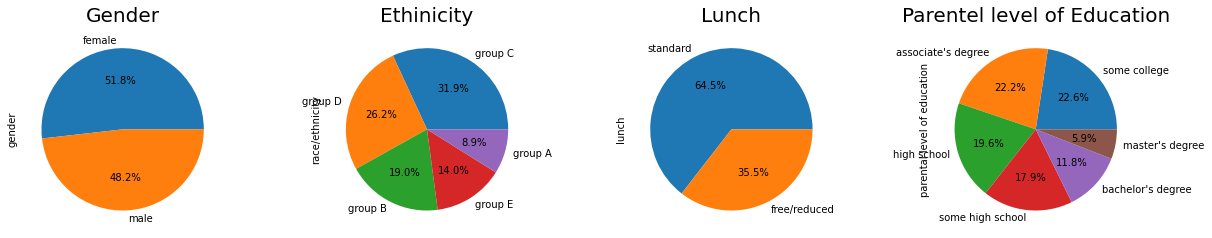

In [26]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(143)
plt.title('Lunch',fontsize = 20)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<AxesSubplot:title={'center':'Gender'}, ylabel='gender'>

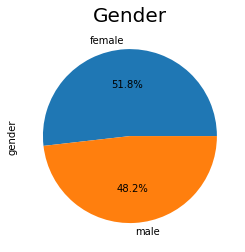

In [28]:
plt.plot(141)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")


In [32]:
df.groupby(['gender']).mean()

,math score,reading score,writing score,total_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


Text(0.5, 1.0, 'GENDER VS TOTAL SCORE')

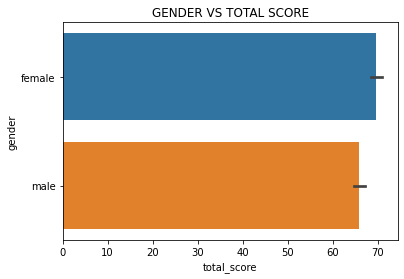

In [34]:
sns.barplot(x='total_score',y='gender',data=df).set_title('GENDER VS TOTAL SCORE')


<AxesSubplot:xlabel='gender', ylabel='writing score'>

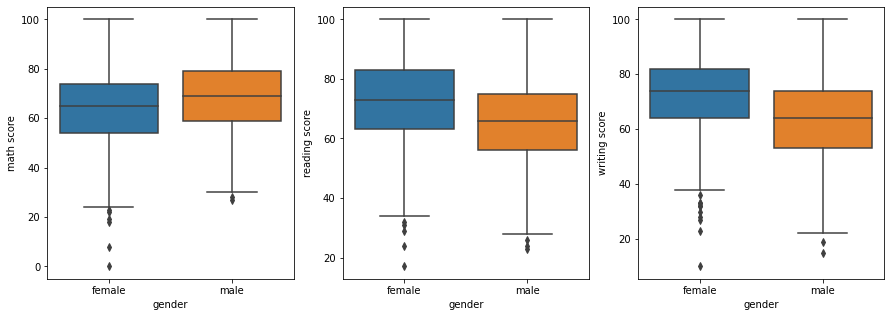

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = df)

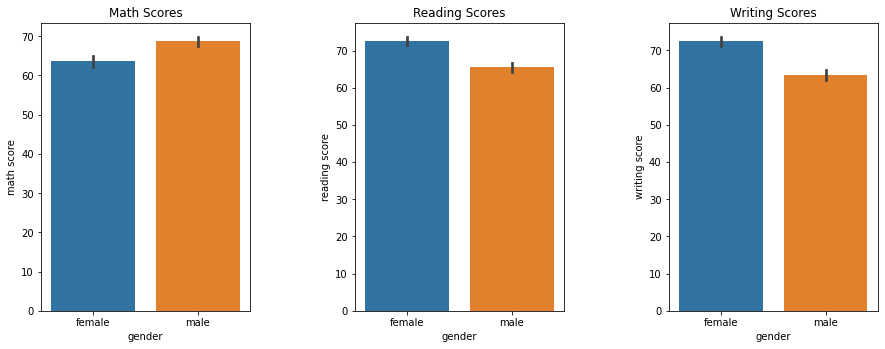

In [37]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=df)
plt.show()

<AxesSubplot:title={'center':'Ethinicity'}, ylabel='race/ethnicity'>

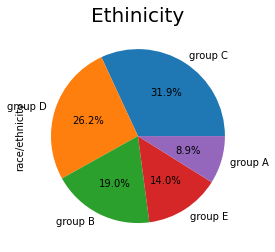

In [29]:
plt.plot(142)
plt.title('Ethinicity',fontsize = 20)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

In [96]:
df.groupby(['race/ethnicity']).mean()


,math score,reading score,writing score,total_score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


<AxesSubplot:xlabel='race/ethnicity', ylabel='total_score'>

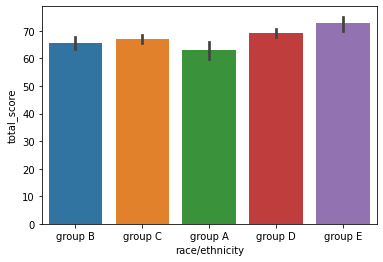

In [40]:
sns.barplot(x='race/ethnicity',y='total_score',data=df)


From this,we can infer that Group E scored the highest scores compared to other groups.



In [97]:
df.groupby(['test preparation course']).mean()

,math score,reading score,writing score,total_score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [99]:
df['test preparation course'].value_counts()


none         642
completed    358
Name: test preparation course, dtype: int64

In [100]:
df.groupby(['race/ethnicity','test preparation course']).mean()

math score  reading score  \
race/ethnicity test preparation course                              
group A        completed                 68.258065      71.032258   
               none                      58.086207      61.275862   
group B        completed                 67.191176      72.852941   
               none                      61.368852      64.286885   
group C        completed                 67.495726      73.658120   
               none                      62.707921      66.465347   
group D        completed                 69.792683      74.146341   
               none                      66.255556      68.155556   
group E        completed                 77.433333      76.666667   
               none                      71.112500      70.300000   

                                        writing score  total_score  
race/ethnicity test preparation course                              
group A        completed                    70.903226    70.064516  
               none                         58.275862    59.212644  
group B        completed                    71.882353    70.642157  
               none                         62.098361    62.584699  
group C        completed                    74.452991    71.868946  
               none                         63.990099    64.387789  
group D        completed                    76.658537    73.532520  
               none                         67.177778    67.196296  
group E        completed                    75.983333    76.694444  
               none                         67.975000    69.795833

c:\users\fbhug\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


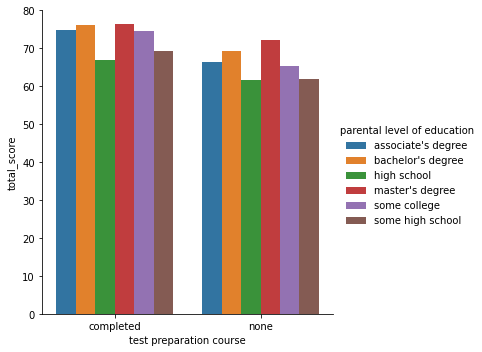

In [104]:
parent_gender = df.groupby(['test preparation course','parental level of education']).mean().reset_index()
sns.factorplot(x='test preparation course', y='total_score', hue='parental level of education', data=parent_gender, kind='bar')

<AxesSubplot:xlabel='test preparation course', ylabel='total_score'>

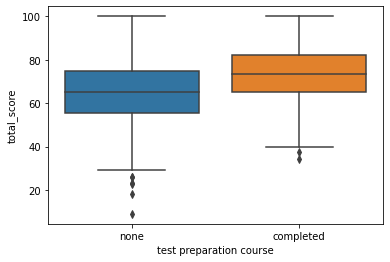

In [105]:
sns.boxplot( y = 'total_score' ,x ='test preparation course' , data = df)


<AxesSubplot:title={'center':'Lunch'}, ylabel='lunch'>

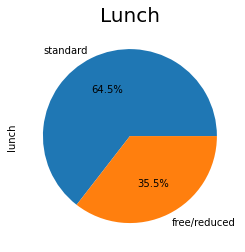

In [30]:
plt.plot(143)
plt.title('Lunch',fontsize = 20)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='lunch', ylabel='total_score'>

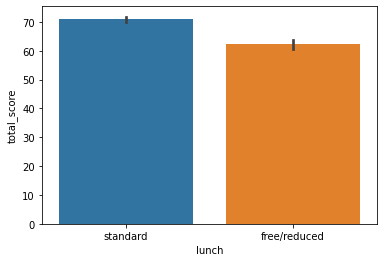

In [53]:
# plt.figure(figsize=(8,3))
sns.barplot(x='lunch',y='total_score',data=df)


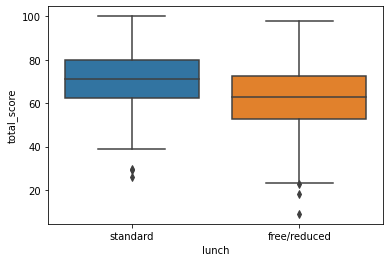

In [54]:
#plt.figure(figsize=(10,))
bplot = sns.boxplot( y = 'total_score' ,x ='lunch'  ,data = df  )


So this shows that the total score was increased when the student had a standard lunch compared to a reduced lunch.

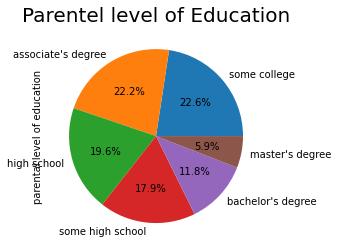

In [31]:
plt.plot(144)
plt.title('Parentel level of Education',fontsize = 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [94]:
df.groupby(['parental level of education']).mean()

,math score,reading score,writing score,total_score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


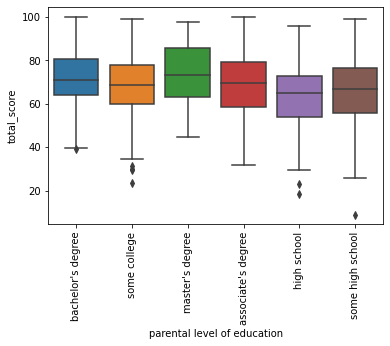

In [107]:
bplot = sns.boxplot( y = 'total_score' ,x ='parental level of education'  ,data = df  )
_ = plt.setp(bplot.get_xticklabels(), rotation=90)

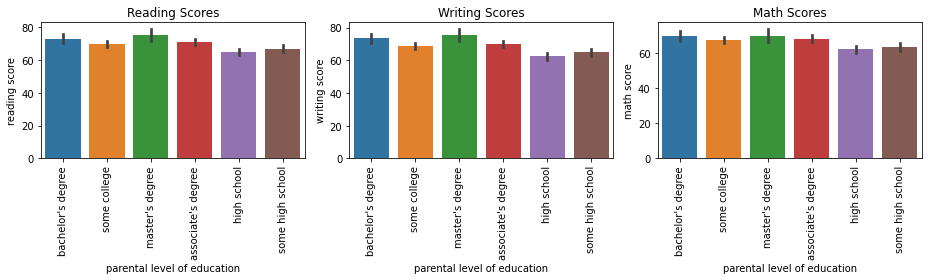

In [55]:
plt.figure(figsize=(13,4))

plt.subplot(1,3,1)
sns.barplot(x = "parental level of education" , y="reading score" , data=df)
plt.xticks(rotation = 90)
plt.title("Reading Scores")

plt.subplot(1,3,2)
sns.barplot(x = "parental level of education" , y="writing score" , data=df)
plt.xticks(rotation=90)
plt.title("Writing Scores")

plt.subplot(1,3,3)
sns.barplot(x = "parental level of education" , y="math score" , data=df)
plt.xticks(rotation=90)
plt.title("Math Scores")

plt.tight_layout()
plt.show()

Parental level of education clearly have a positive impact on the scores.
Student's whose parents have master's degree have the highest score in all categories.

Student's whose parents have bachelor's degree or associate degree performed reasonably well in all categories.



In [57]:
X = df.drop('total_score',axis = 1)
X = pd.get_dummies(X)

In [58]:
X.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


<AxesSubplot:>

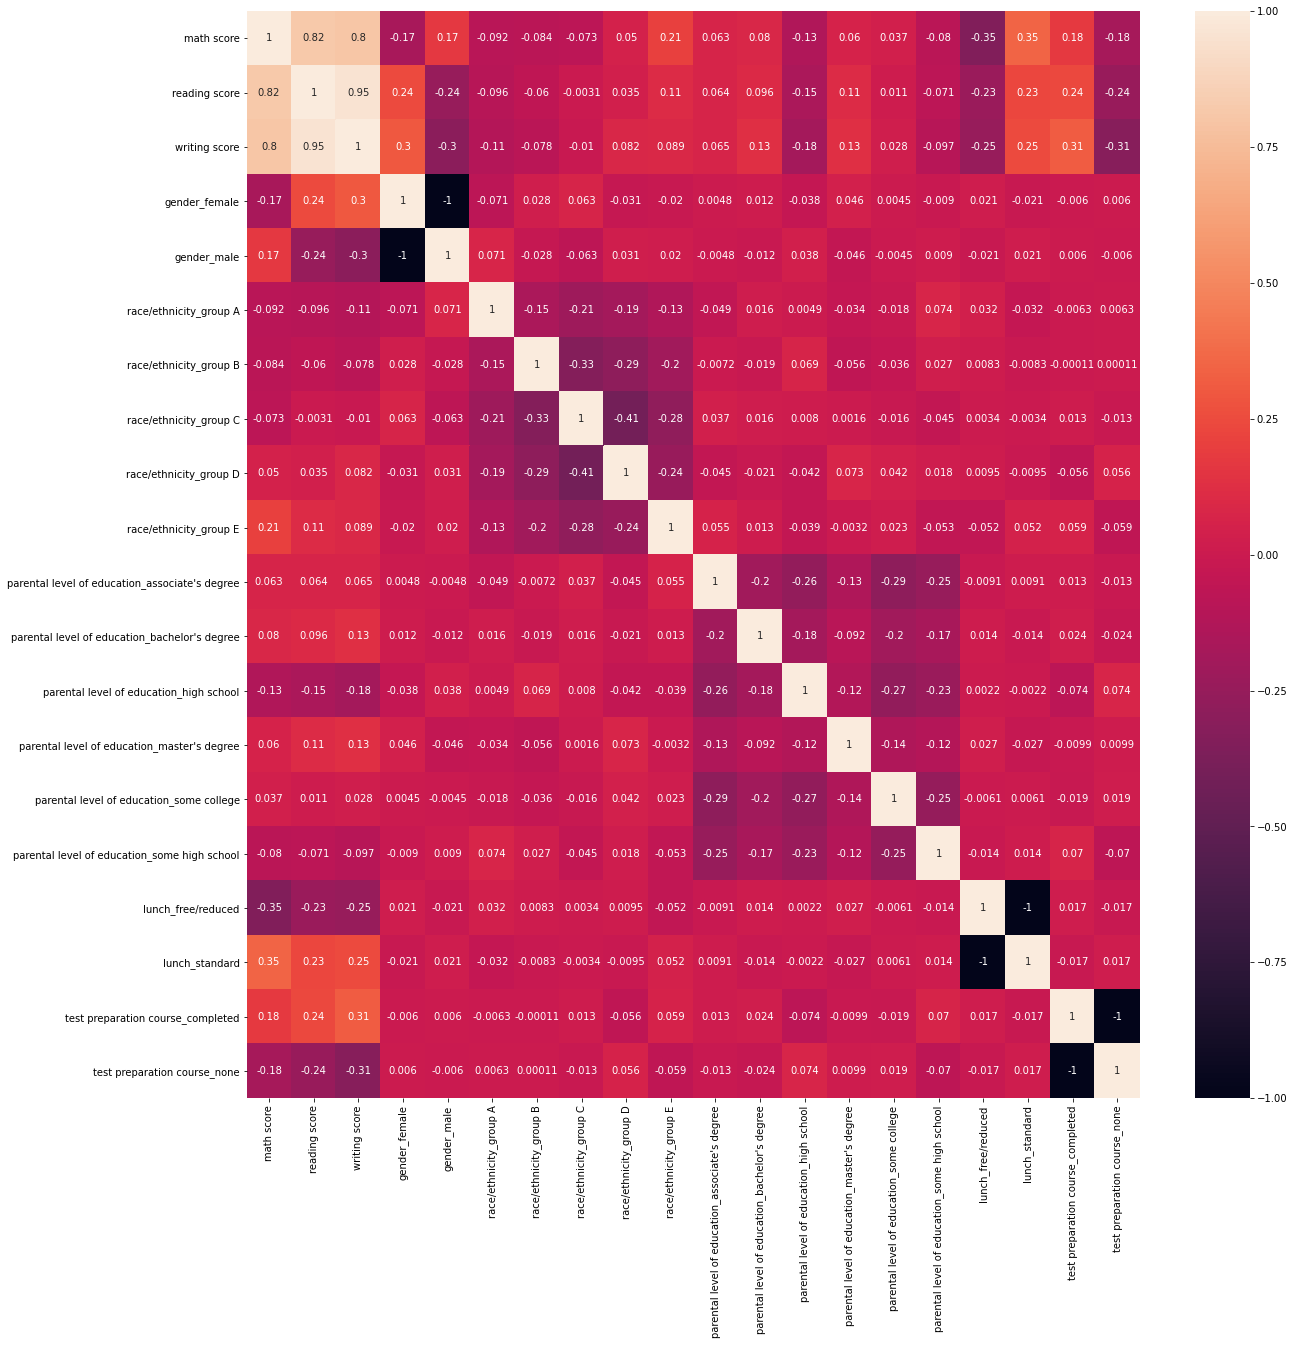

In [60]:
plt.figure(figsize =(20,20))
sns.heatmap(X.corr(),annot=True)

In [61]:
y = df['total_score']
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: total_score, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train , y_train ,x_test ,y_test = train_test_split(X,y,test_size = 0.3 ,random_state =42)

In [63]:
lr = LinearRegression()
lr.fit(x_train,x_test)
predict = lr.predict(y_train)
mse = mean_squared_error(y_test ,predict)
print(mse)
print(lr.coef_)
print(lr.intercept_)

3.5173730041994474e-28
[ 3.33333333e-01  3.33333333e-01  3.33333333e-01  9.75348274e-16
 -9.77082998e-16  8.95496784e-16  3.27212216e-16 -7.88214979e-17
 -1.55496276e-15  4.16333634e-16 -1.96435750e-15  1.07617908e-15
  3.79037080e-16  4.51624415e-16  2.70508442e-16 -2.09467860e-16
 -8.60422844e-16  8.60422844e-16 -4.24573571e-16  4.23706209e-16]
7.105427357601002e-14


In [64]:
rmse = np.sqrt(mse)
rmse

1.8754660765258985e-14

In [110]:
!pip install xgboost

In [113]:
from xgboost import XGBRegressor


ModuleNotFoundError: No module named 'xgboost'

In [79]:
xgb = XGBRegressor()
xgb.fit(x_train,x_test)
predict = xgb.predict(y_train)
mse = mean_squared_error(y_test ,predict)
print(mse)
rmse = np.sqrt(mse)
rmse

NameError: name 'XGBRegressor' is not defined